In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = [80, 25]

# After importing the modules, we are defining our functions:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In the next line we are going to choose the number of days we want to predict. For this project we have chosen 7 days, but it can be changed for investigating:

In [5]:
days = 28

## LSTM with only 1 layer

First we read the data:

In [141]:
df = pd.read_csv('./final_dataframe.csv',index_col='datetime')

Then we define the function for splitting the data:

In [142]:
def split_data(df, m, n):
    """
    With this function we are splitting the data in arrays of lenght m to predict n values.
    """
    range_values = df.shape[0]-m-n+1
    X_aux = []
    y_aux = []
    for i in range(range_values):
        X_aux.append(np.array(df.iloc[i:i+m,]))
        y_aux.append(np.array(df.iloc[i+m:i+m+n,]))
    
    X = np.array(X_aux)
    y = np.array(y_aux)
    
    return X, y

Splitting the data:

In [155]:
# We are selecting the columns that we want:
df2 = df[['Termino_de_facturacion_de_energia_activa_del_PVPC_eficiencia_2_periodos_(DHA)']]

days= 7
last_value = df3.shape[0]-24*days

# We fit the scalers:
scaler = MinMaxScaler(feature_range=(0, 1))
aux = scaler.fit_transform(df2)
df3 = pd.DataFrame(aux, columns = df2.columns, index=df2.index)
days= 7

# Then we split into X and y:
days_used_for_pd = 7
m = days_used_for_pd * 24
n = days * 24
X , y = split_data(df3, m, n)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=101)


X_test_pd = df3[last_value-m:last_value].values
X_test_pd = X_test_pd.reshape(X_test_pd.shape[1],X_test_pd.shape[0],1)
y_test_pd = df3[last_value:].values

Now, we create the model:

In [ ]:
%%time
# design network
model = Sequential()
model.add(LSTM(40, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dense(n, activation = 'relu'))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=10, batch_size=2, validation_split=0.2, verbose=2, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Epoch 1/10
17840/17840 - 428s - loss: 3411347.5000 - val_loss: 0.0903
Epoch 2/10
17840/17840 - 429s - loss: 0.0876 - val_loss: 0.0856
Epoch 3/10
17840/17840 - 431s - loss: 0.0821 - val_loss: 0.0785
Epoch 4/10
17840/17840 - 424s - loss: 0.0764 - val_loss: 0.0731
Epoch 5/10
17840/17840 - 423s - loss: 0.0575 - val_loss: 0.0369
Epoch 6/10
17840/17840 - 424s - loss: 0.0273 - val_loss: 0.0195
Epoch 7/10
17840/17840 - 643s - loss: 0.0158 - val_loss: 0.0123
Epoch 8/10
17840/17840 - 1261s - loss: 0.0108 - val_loss: 0.0098
Epoch 9/10


Finally we check the results:

In [ ]:
# make a prediction
yhat = model.predict(X_test_pd)
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(y_test_pd)
# calculate metrics
inv_y = inv_y.reshape(1,168)[0]
inv_yhat = inv_yhat[0]
print('Para los resultados de las últimas 4 semanas se obtiene un RMSE de ',np.sqrt(mean_squared_error(inv_y, inv_yhat)),', un R2 de ',r2_score(inv_y, inv_yhat),' y un MAPE de',mean_absolute_percentage_error(inv_y, inv_yhat))
# Finally we plot the results:
plt.rcParams['figure.figsize'] = [80, 25]
plt.plot(np.array(inv_y), label='test')
plt.plot(np.array(inv_yhat), label='pred')
plt.legend(prop={'size': 40})
plt.xticks(rotation=90, fontsize = 7)
plt.show()

Finally, we export the results

In [11]:
pd.DataFrame({'y_test':inv_y, 'y_pred':inv_yhat},index = df3[last_value:].index).to_csv('./../Visualization/Neural_network_time_series_1_LSTM.csv')

## LSTM with more than one layer

First we read the data:

In [3]:
df = pd.read_csv('./final_dataframe.csv',index_col='datetime')

Then we define the function for splitting the data:

In [7]:
def split_data(df, m, n):
    """
    With this function we are splitting the data in arrays of lenght m to predict n values.
    """
    range_values = df.shape[0]-m-n+1
    X_aux = []
    y_aux = []
    for i in range(range_values):
        X_aux.append(np.array(df.iloc[i:i+m,]))
        y_aux.append(np.array(df.iloc[i+m:i+m+n,]))
    
    X = np.array(X_aux)
    y = np.array(y_aux)
    
    return X, y

Splitting the data:

In [8]:
# We are selecting the columns that we want:
df2 = df[['Termino_de_facturacion_de_energia_activa_del_PVPC_eficiencia_2_periodos_(DHA)']]

days= 7
last_value = df3.shape[0]-24*days

# We fit the scalers:
scaler = MinMaxScaler(feature_range=(0, 1))
aux = scaler.fit_transform(df2)
df3 = pd.DataFrame(aux, columns = df2.columns, index=df2.index)
df4 = df3[30000:last_value]
days= 7

# Then we split into X and y:
days_used_for_pd = 7
m = days_used_for_pd * 24
n = days * 24
X , y = split_data(df4, m, n)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=101)


X_test_pd = df3[last_value-m:last_value].values
X_test_pd = X_test_pd.reshape(X_test_pd.shape[1],X_test_pd.shape[0],1)
y_test_pd = df3[last_value:].values

Now, we create the model:

Epoch 1/80
16/16 - 1s - loss: 0.1449 - val_loss: 0.0326
Epoch 2/80
16/16 - 1s - loss: 0.0460 - val_loss: 0.0277
Epoch 3/80
16/16 - 1s - loss: 0.0352 - val_loss: 0.0332
Epoch 4/80
16/16 - 1s - loss: 0.0292 - val_loss: 0.0255
Epoch 5/80
16/16 - 1s - loss: 0.0254 - val_loss: 0.0244
Epoch 6/80
16/16 - 1s - loss: 0.0212 - val_loss: 0.0201
Epoch 7/80
16/16 - 1s - loss: 0.0176 - val_loss: 0.0160
Epoch 8/80
16/16 - 1s - loss: 0.0150 - val_loss: 0.0127
Epoch 9/80
16/16 - 1s - loss: 0.0134 - val_loss: 0.0120
Epoch 10/80
16/16 - 1s - loss: 0.0127 - val_loss: 0.0115
Epoch 11/80
16/16 - 1s - loss: 0.0129 - val_loss: 0.0108
Epoch 12/80
16/16 - 1s - loss: 0.0135 - val_loss: 0.0087
Epoch 13/80
16/16 - 1s - loss: 0.0150 - val_loss: 0.0088
Epoch 14/80
16/16 - 1s - loss: 0.0155 - val_loss: 0.0087
Epoch 15/80
16/16 - 1s - loss: 0.0212 - val_loss: 0.0283
Epoch 16/80
16/16 - 1s - loss: 0.0340 - val_loss: 0.0145
Epoch 17/80
16/16 - 1s - loss: 0.0169 - val_loss: 0.0123
Epoch 18/80
16/16 - 1s - loss: 0.0127 - 

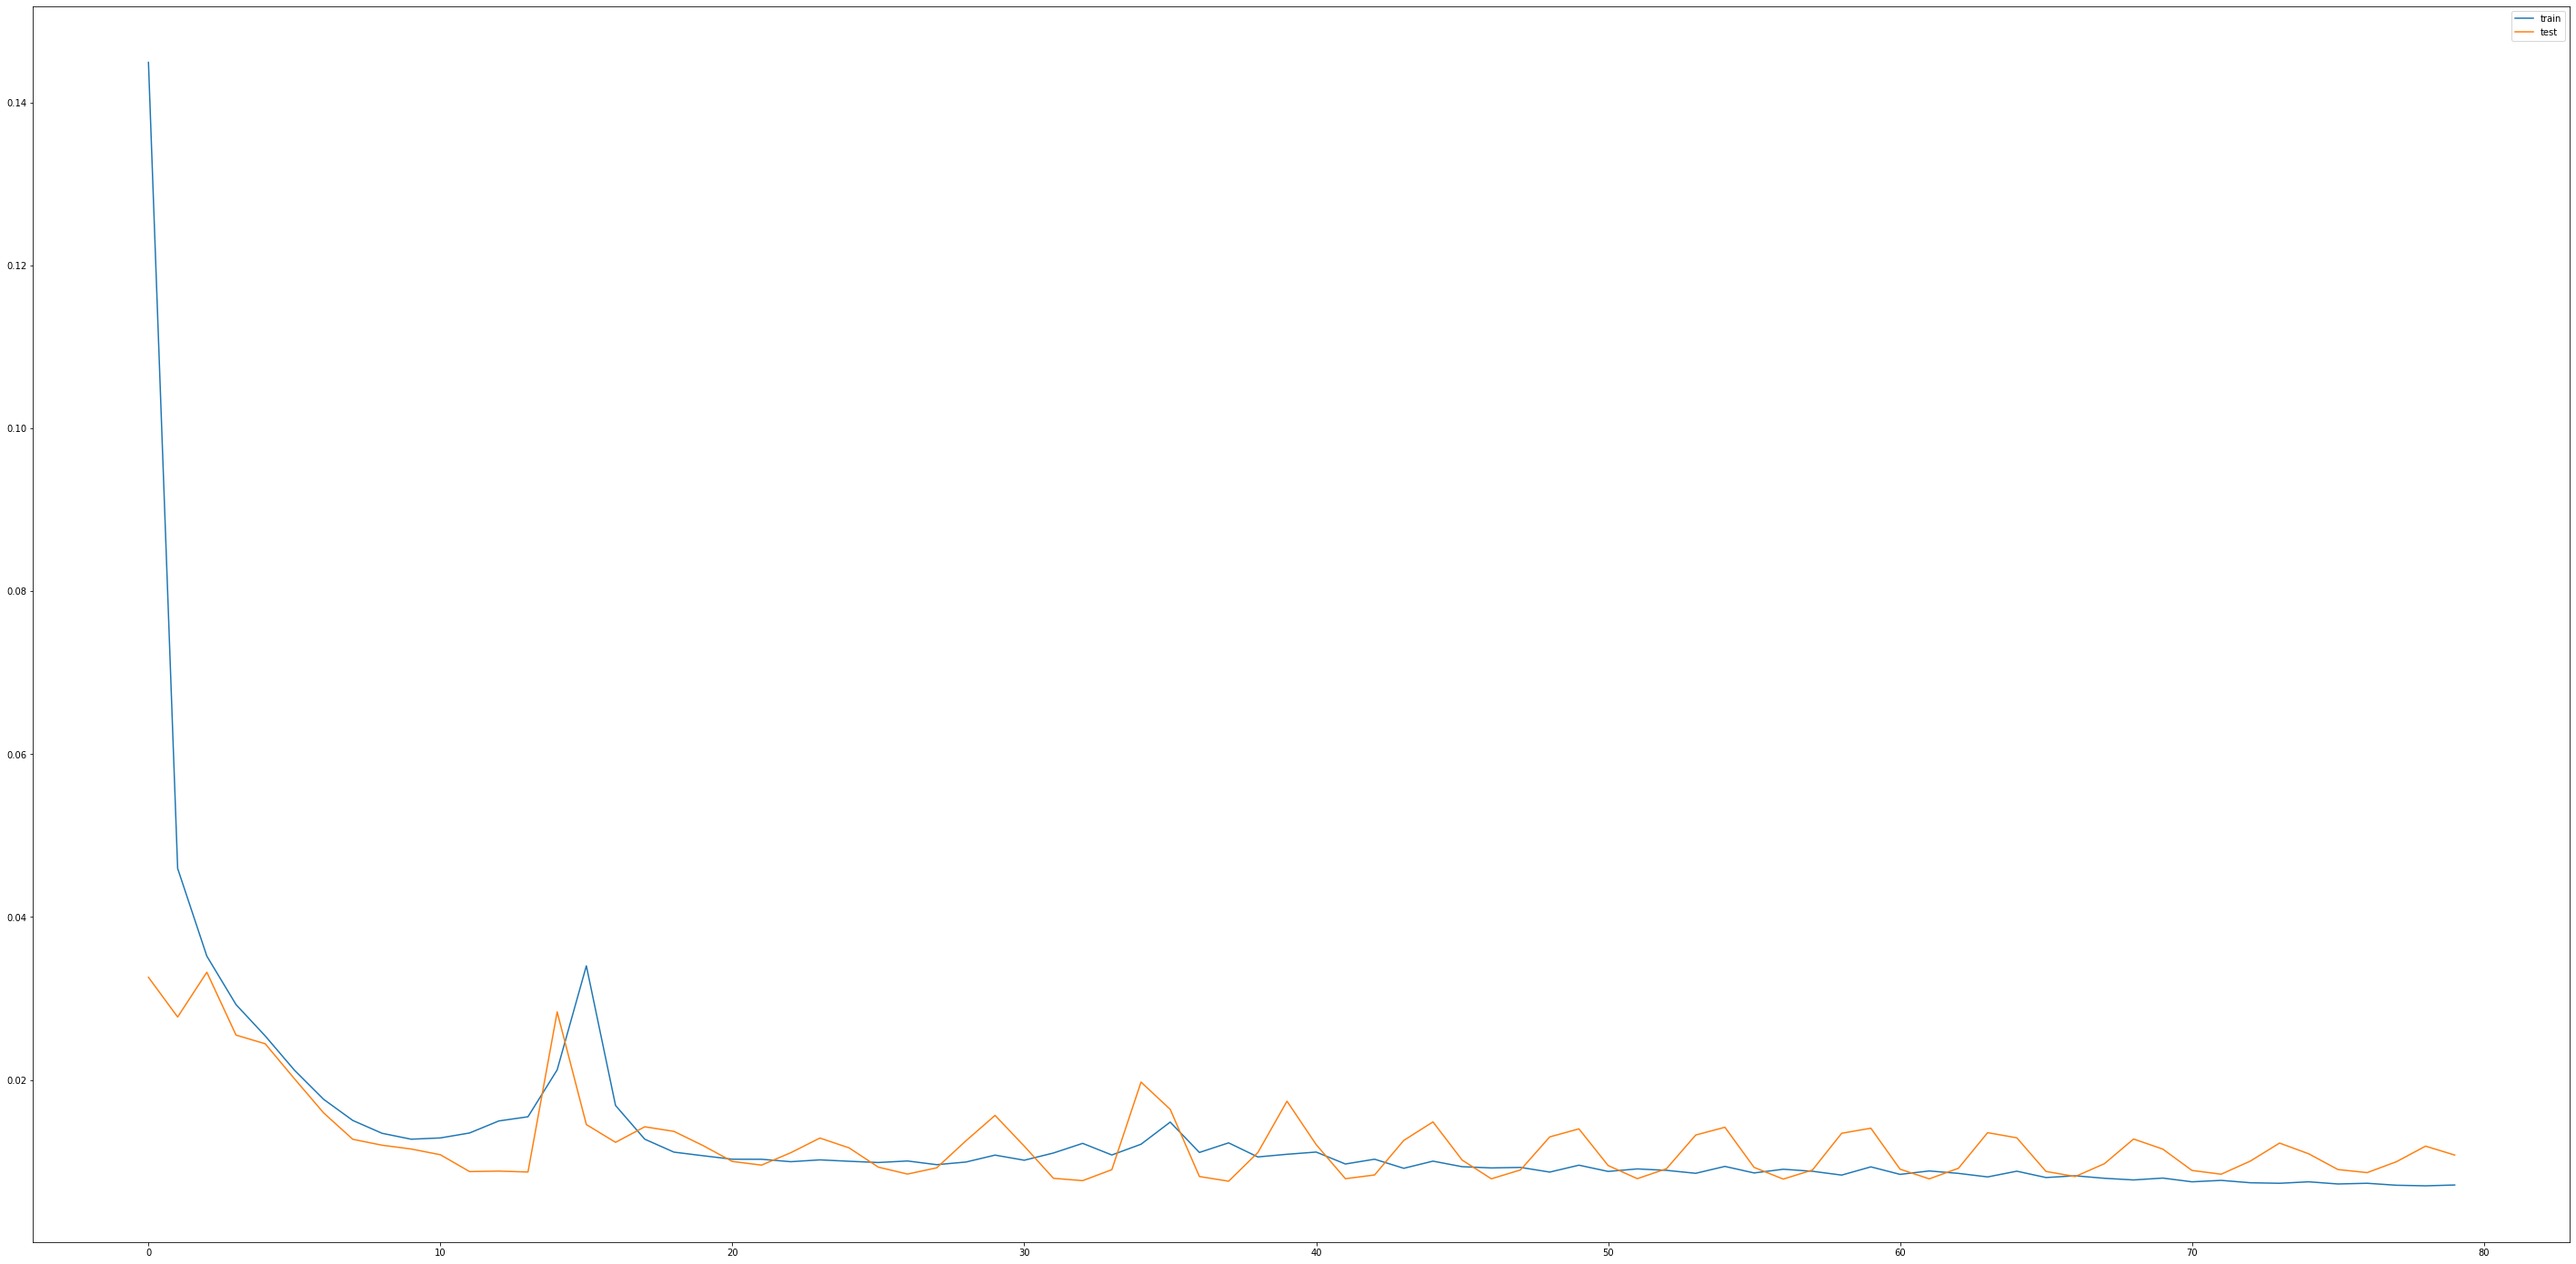

CPU times: user 5min 56s, sys: 23.3 s, total: 6min 20s
Wall time: 1min 4s


In [30]:
%%time
# design network
regressor2 = Sequential()

model2.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model2.add(Dropout(0.25))

model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.1))

model2.add(LSTM(units = 20))
model2.add(Dropout(0.1))

model2.add(Dense(units = 1))

model2.compile(optimizer = 'adam', loss = 'mse')

history = regressor2.fit(X_train, y_train, epochs = 10, batch_size = 100, validation_split=0.2, verbose=2, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(prop={'size': 40})
plt.xticks(rotation=90, fontsize = 7)
plt.show()

Test RMSE: 21.938


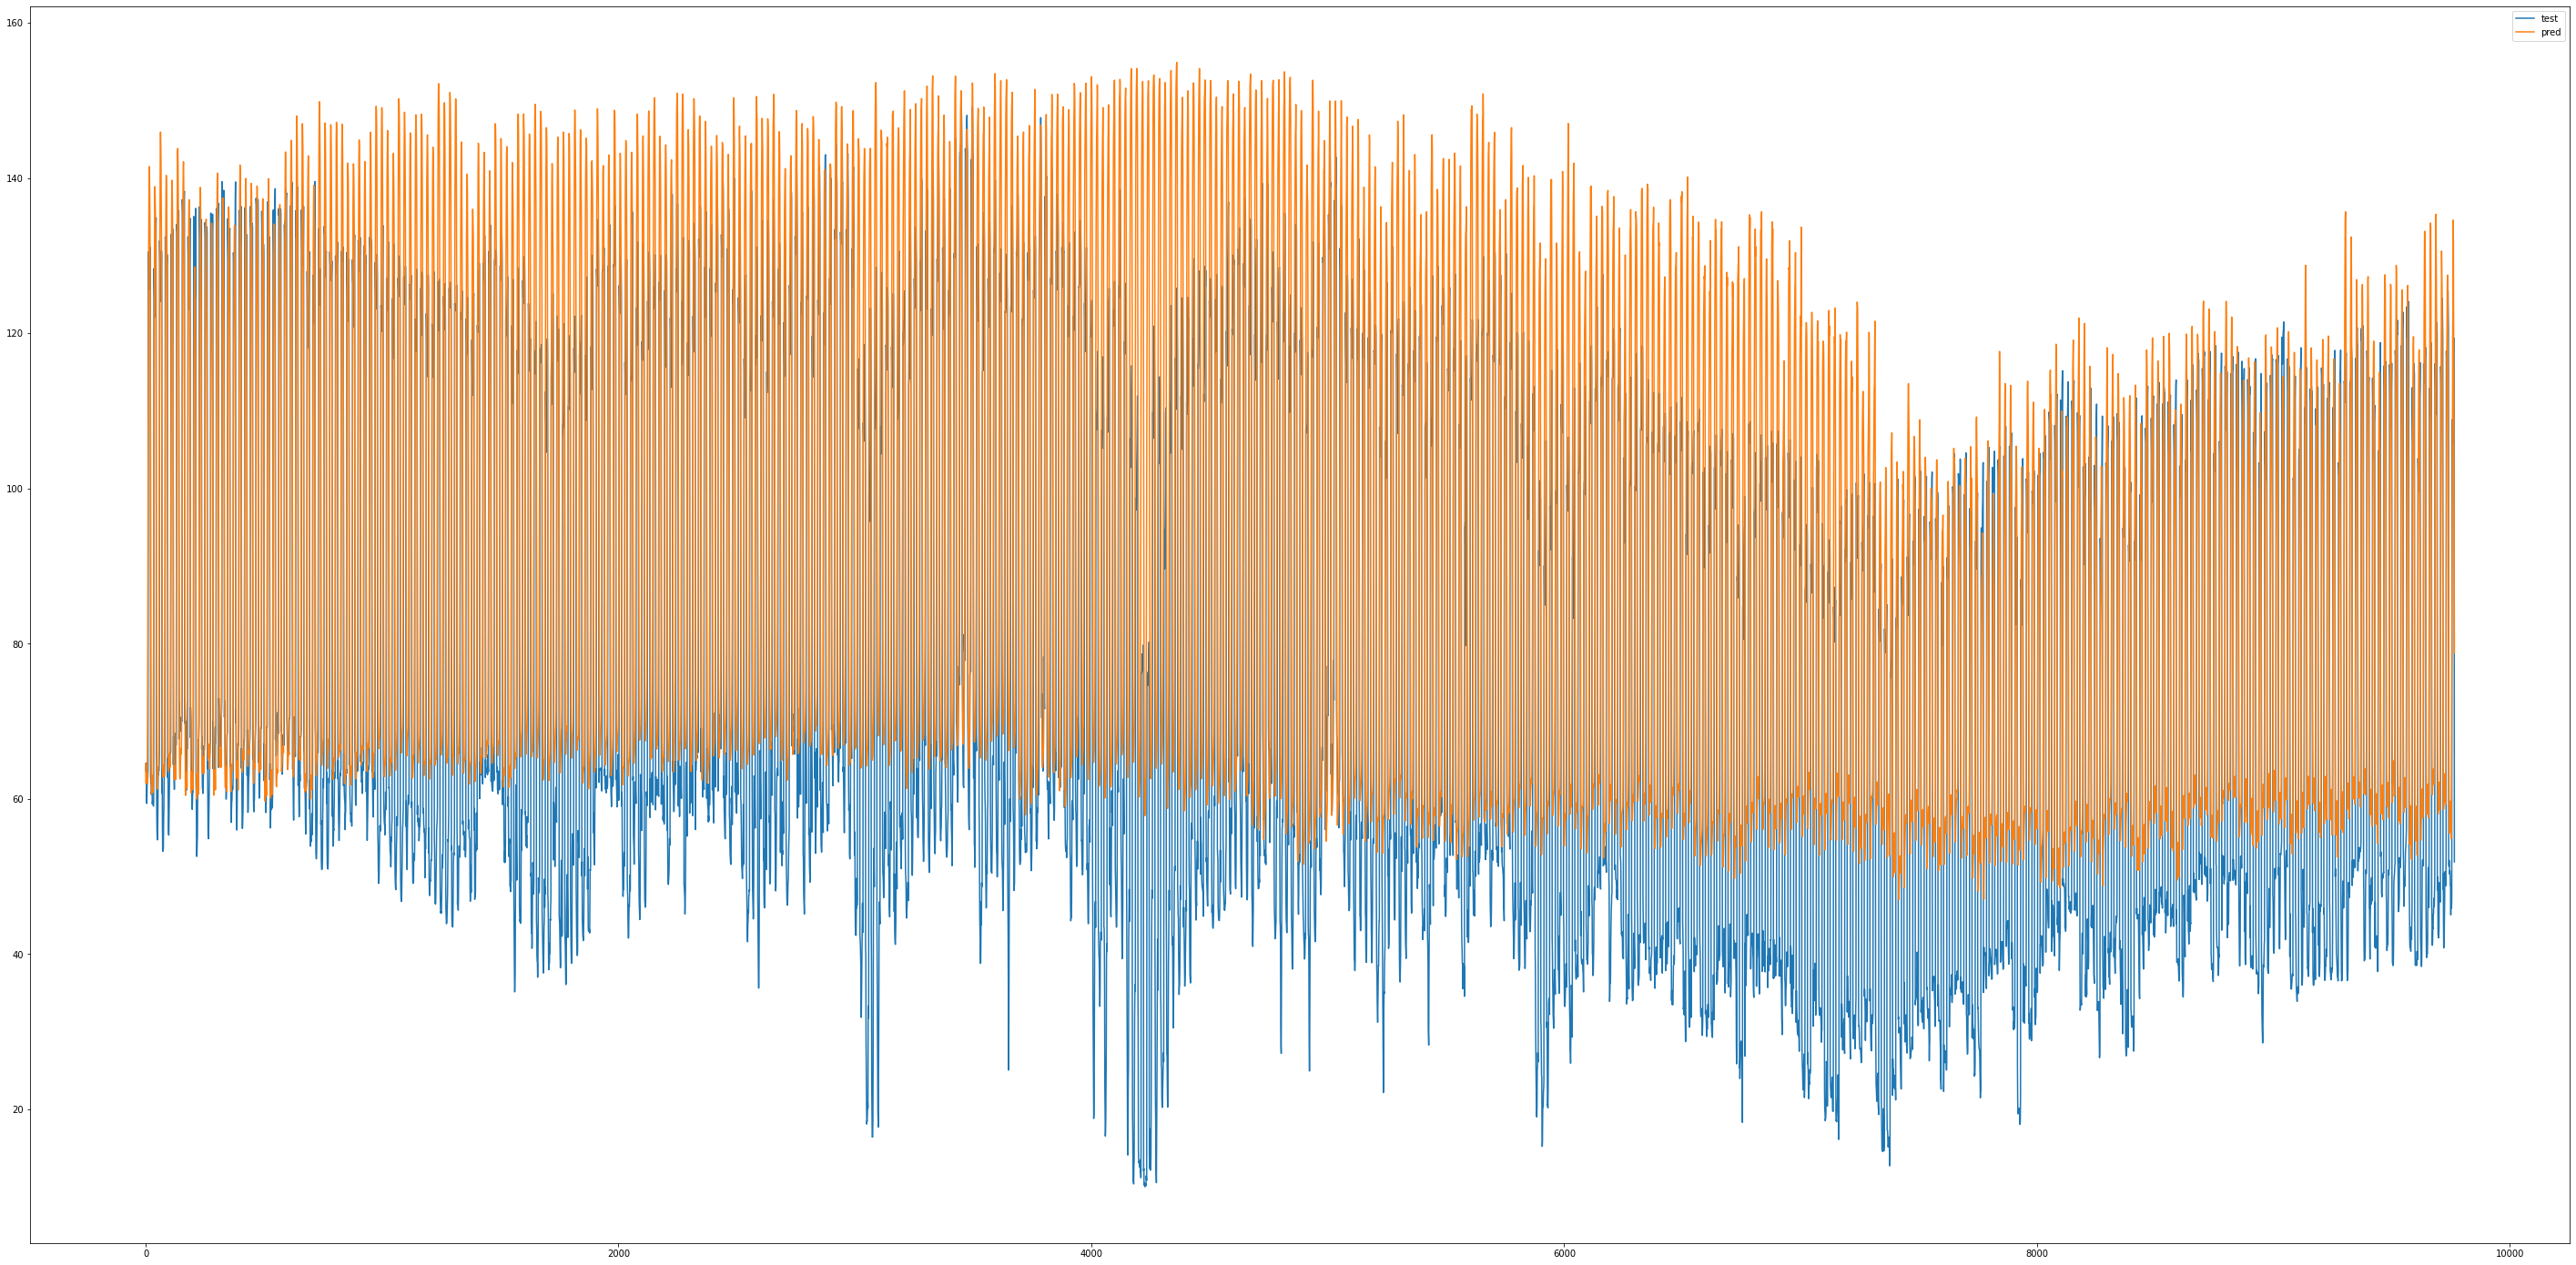

In [31]:
# make a prediction
yhat = model.predict(X_test_pd)
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(y_test_pd)
# calculate metrics
inv_y = inv_y.reshape(1,168)[0]
inv_yhat = inv_yhat[0]
print('Para los resultados de las últimas 4 semanas se obtiene un RMSE de ',np.sqrt(mean_squared_error(inv_y, inv_yhat)),', un R2 de ',r2_score(inv_y, inv_yhat),' y un MAPE de',mean_absolute_percentage_error(inv_y, inv_yhat))
# Finally we plot the results:
plt.rcParams['figure.figsize'] = [80, 25]
plt.plot(np.array(inv_y), label='test')
plt.plot(np.array(inv_yhat), label='pred')
plt.legend(prop={'size': 40})
plt.xticks(rotation=90, fontsize = 7)
plt.show()

Finally, we export the results

In [33]:
pd.DataFrame({'y_test':inv_y, 'y_pred':inv_yhat},index = df3[last_value:].index).to_csv('./../Visualization/Neural_network_time_series_1_LSTM.csv')

## DNN with shuffled data

First, we read the data:

In [2]:
df = pd.read_csv('./final_dataframe.csv',index_col='datetime')

In [4]:
days = 28

It is important to considerate the time that we want to predict. If we want to know the price for 1 week, we will need to shift the target column X days so, with the information we have today, we can predict the value for the electricity in X days:

In [5]:
df['Termino_de_facturacion_de_energia_activa_del_PVPC_eficiencia_2_periodos_(DHA)']=df['Termino_de_facturacion_de_energia_activa_del_PVPC_eficiencia_2_periodos_(DHA)'].shift(-24*days)
df.dropna(axis=0,how='any',inplace=True)

Then we select the columns:

In [6]:
model_columns = ['Demanda_programada_P48_total', 
                 'Demanda_programada_P48_Correccion_eolica',
                 'Demanda_programada_P48_Correccion_solar',
                 'Precio_mercado_SPOT_Diario',
                 'Precio_mercado_SPOT_Intradiario_Sesion_1',
                 'Precio_mercado_SPOT_Intradiario_Sesion_2',
                 'Precio_mercado_SPOT_Intradiario_Sesion_3',
                 'Precio_mercado_SPOT_Intradiario_Sesion_4',
                 'Precio_mercado_SPOT_Intradiario_Sesion_5',
                 'Precio_mercado_SPOT_Intradiario_Sesion_6',
                 'Precio_mercado_SPOT_Intradiario_Sesion_7',
                 'Generacion_programada_P48_Biogas',
                 'Generacion_programada_P48_Biomasa',
                 'Generacion_programada_P48_Ciclo_combinado',
                 'Generacion_programada_P48_Consumo_bombeo',
                 'Generacion_programada_P48_Derivados_del_petroleo_o_carbon',
                 'Generacion_programada_P48_Energia_residual',
                 'Generacion_programada_P48_Enlace_Baleares',
                 'Generacion_programada_P48_Eolica_terrestre',
                 'Generacion_programada_P48_Gas_Natural',
                 'Generacion_programada_P48_Gas_Natural_Cogeneracion',
                 'Generacion_programada_P48_Hidraulica_UGH',
                 'Generacion_programada_P48_Hidraulica_no_UGH',
                 'Generacion_programada_P48_Hulla_antracita',
                 'Generacion_programada_P48_Hulla_sub-bituminosa',
                 'Generacion_programada_P48_Nuclear',
                 'Generacion_programada_P48_Oceano_y_geotermica',
                 'Generacion_programada_P48_Residuos_domesticos_y_similares',
                 'Generacion_programada_P48_Residuos_varios',
                 'Generacion_programada_P48_Solar_fotovoltaica',
                 'Generacion_programada_P48_Solar_termica',
                 'Generacion_programada_P48_Subproductos_mineria',
                 'Generacion_programada_P48_Turbinacion_bombeo',
                 'Consumer_price_index', 
                 'Time_required_to_get_electricity_(days)',
                 'Inflation,consumer_prices_(annual_%)',
                 'Employment_in_industry_(%_of_total_employment)', 
                 'PIB_Trimestral', 
                 'Var_Trim_PIB_(%)', 
                 'Var_anual_PIB_Trim_(%)',
                 'IBEX35',
                 'Red_Electrica',
                 'Temperature',
                 #'Weekday_Monday','Weekday_Tuesday', 'Weekday_Wednesday','Weekday_Thursday',
                 #'Weekday_Friday', 'Weekday_Saturday', 
                 'sin_weekday','cos_weekday',
                 'holidays', 
                 #'Hour_0', 'Hour_1', 'Hour_2',
                 #'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
                 #'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
                 #'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
                 #'Hour_22',
                 'sin_hour','cos_hour','sin_month','cos_month',
                 #'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
                 #'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
                 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7', 'Day_8',
                 'Day_9', 'Day_10', 'Day_11', 'Day_12', 'Day_13', 'Day_14', 'Day_15',
                 'Day_16', 'Day_17', 'Day_18', 'Day_19', 'Day_20', 'Day_21', 'Day_22',
                 'Day_23', 'Day_24', 'Day_25', 'Day_26', 'Day_27', 'Day_28', 'Day_29',
                 'Day_30']

After that we have to split the data into train and test:

In [7]:
# We are selecting the columns that we want:
df2 = df[['Termino_de_facturacion_de_energia_activa_del_PVPC_eficiencia_2_periodos_(DHA)']+model_columns]

# We fit the scalers:
scaler = MinMaxScaler(feature_range=(0, 1))
aux = scaler.fit_transform(df2)
df3 = pd.DataFrame(aux, columns = df2.columns, index=df2.index)
last_value = df3.shape[0]-24*days


# Then we split into X and y:
X = df3.loc[:,model_columns]
y = df3.loc[:,'Termino_de_facturacion_de_energia_activa_del_PVPC_eficiencia_2_periodos_(DHA)']

X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(X[:last_value], y[:last_value], train_size=0.8,test_size=0.2, random_state=101)

# Convert everything to float32:
X_train = X_train_aux.values.astype('float32')
y_train = y_train_aux.values.astype('float32')
X_test = X_test_aux.values.astype('float32')
y_test = y_test_aux.values.astype('float32')

# Let's get the last X days:
X_test_pd = X[last_value:].values.astype('float32')
y_test_pd = y[last_value:].values.astype('float32')

We build the model:

Epoch 1/30
351/351 - 34s - loss: 0.0118 - val_loss: 0.0059
Epoch 2/30
351/351 - 40s - loss: 0.0033 - val_loss: 0.0019
Epoch 3/30
351/351 - 38s - loss: 0.0022 - val_loss: 0.0013
Epoch 4/30
351/351 - 42s - loss: 0.0018 - val_loss: 0.0012
Epoch 5/30
351/351 - 38s - loss: 0.0013 - val_loss: 0.0027
Epoch 6/30
351/351 - 38s - loss: 0.0015 - val_loss: 0.0019
Epoch 7/30
351/351 - 41s - loss: 0.0012 - val_loss: 0.0011
Epoch 8/30
351/351 - 38s - loss: 9.0960e-04 - val_loss: 0.0014
Epoch 9/30
351/351 - 37s - loss: 0.0012 - val_loss: 9.0121e-04
Epoch 10/30
351/351 - 40s - loss: 0.0011 - val_loss: 8.8425e-04
Epoch 11/30
351/351 - 35s - loss: 7.2855e-04 - val_loss: 7.3801e-04
Epoch 12/30
351/351 - 42s - loss: 5.8494e-04 - val_loss: 6.8325e-04
Epoch 13/30
351/351 - 38s - loss: 5.3246e-04 - val_loss: 6.3861e-04
Epoch 14/30
351/351 - 43s - loss: 4.8921e-04 - val_loss: 6.4332e-04
Epoch 15/30
351/351 - 38s - loss: 4.7072e-04 - val_loss: 6.7209e-04
Epoch 16/30
351/351 - 41s - loss: 0.0015 - val_loss: 0.00

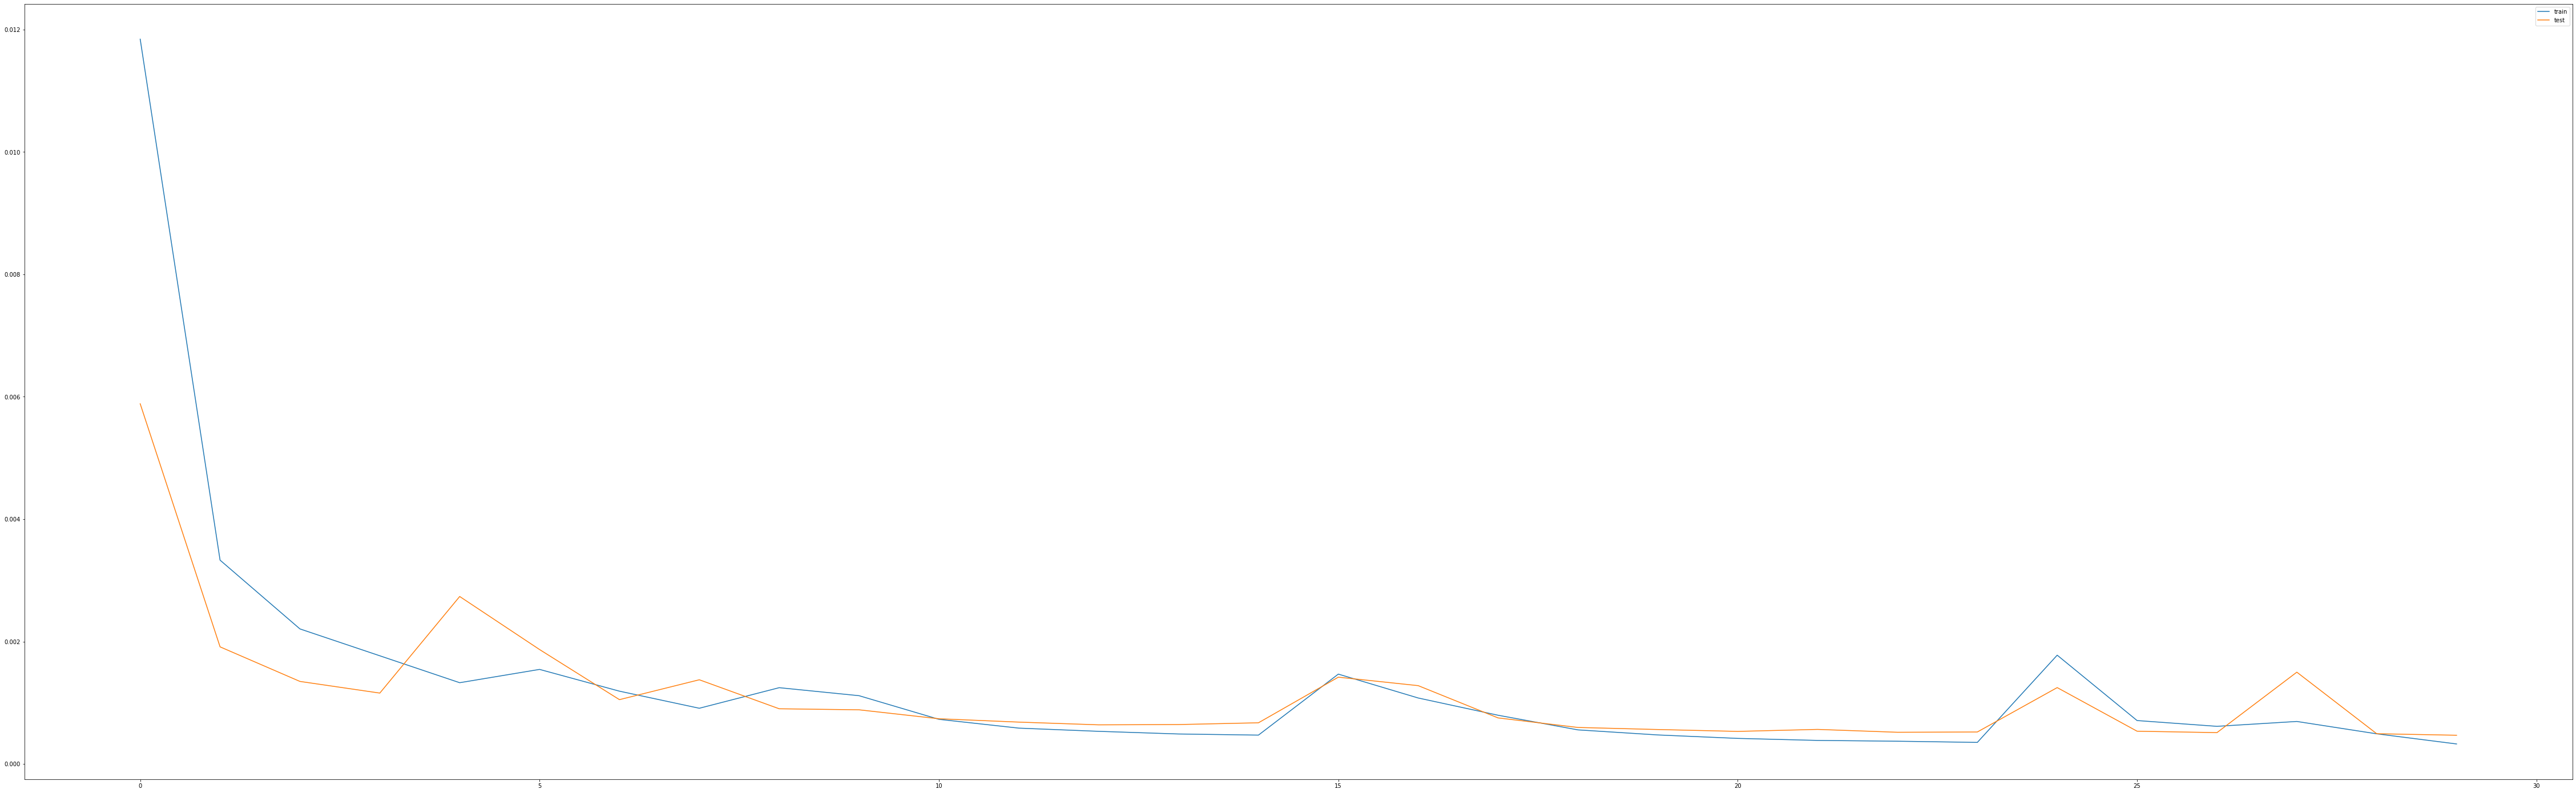

CPU times: user 1h 22min 15s, sys: 20min 1s, total: 1h 42min 17s
Wall time: 19min 44s


In [31]:
%%time
# design network
model = Sequential()
model.add(Dense(4096, input_dim=X_train.shape[1], activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(2048, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=30, batch_size=100, validation_split=0.2, verbose=2, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Finally we plot the results and the metrics:

Para los resultados de las últimas 4 semanas se obtiene un RMSE de  4.4978957 , un R2 de  0.986511632033452  y un MAPE de 4.763372614979744


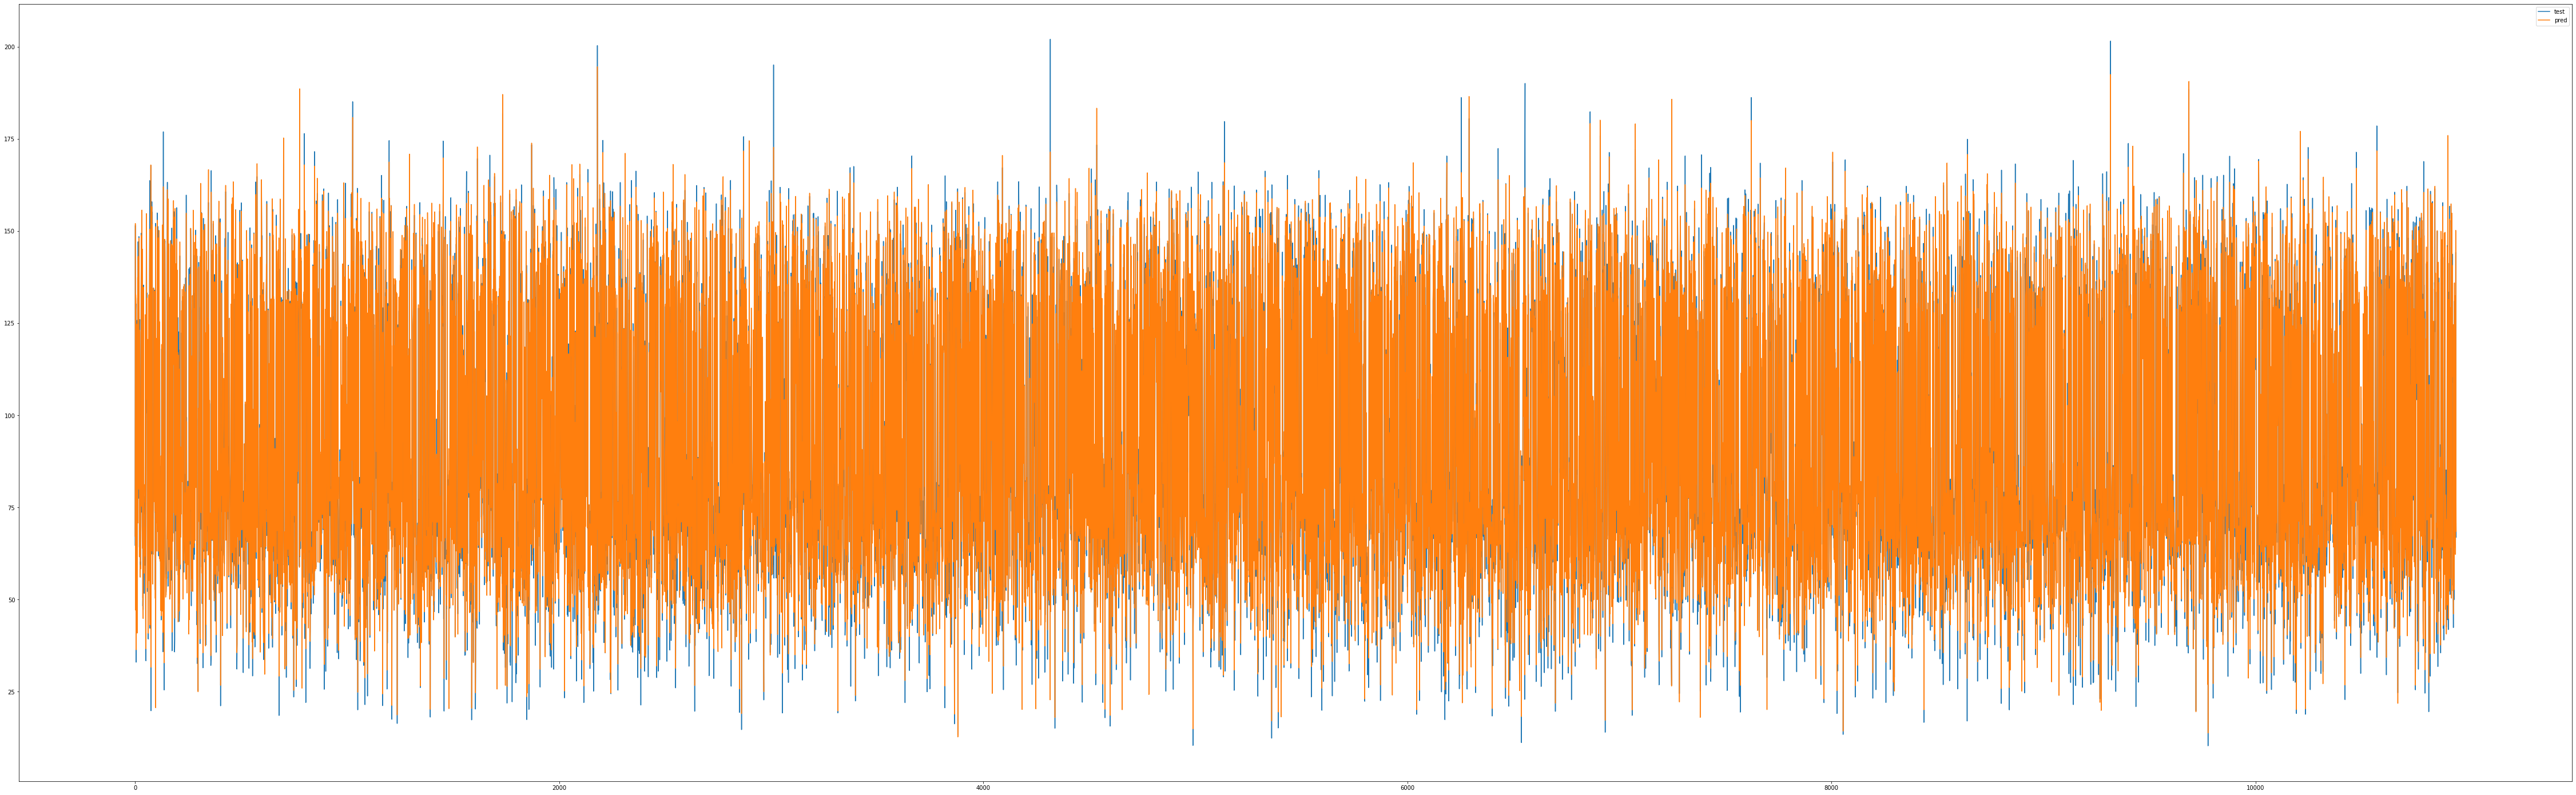

In [32]:
# make a prediction
yhat = model.predict(X_test)
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test[:, :]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
inv_y = np.concatenate((y_test.reshape(-1,1), X_test[:, :]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate metrics and plot:
plt.rcParams['figure.figsize'] = [80, 25]
print('Para los resultados de las últimas 4 semanas se obtiene un RMSE de ',np.sqrt(mean_squared_error(inv_y, inv_yhat)),', un R2 de ',r2_score(inv_y, inv_yhat),' y un MAPE de',mean_absolute_percentage_error(inv_y, inv_yhat))
plt.plot(inv_y, label='test')
plt.plot(inv_yhat, label='pred')
plt.legend(prop={'size': 40})
plt.xticks(rotation=90, fontsize = 7)
plt.show()

Para los resultados de las últimas 4 semanas se obtiene un RMSE de  4.9724493 , un R2 de  0.9787354271652147  y un MAPE de 6.713151931762695


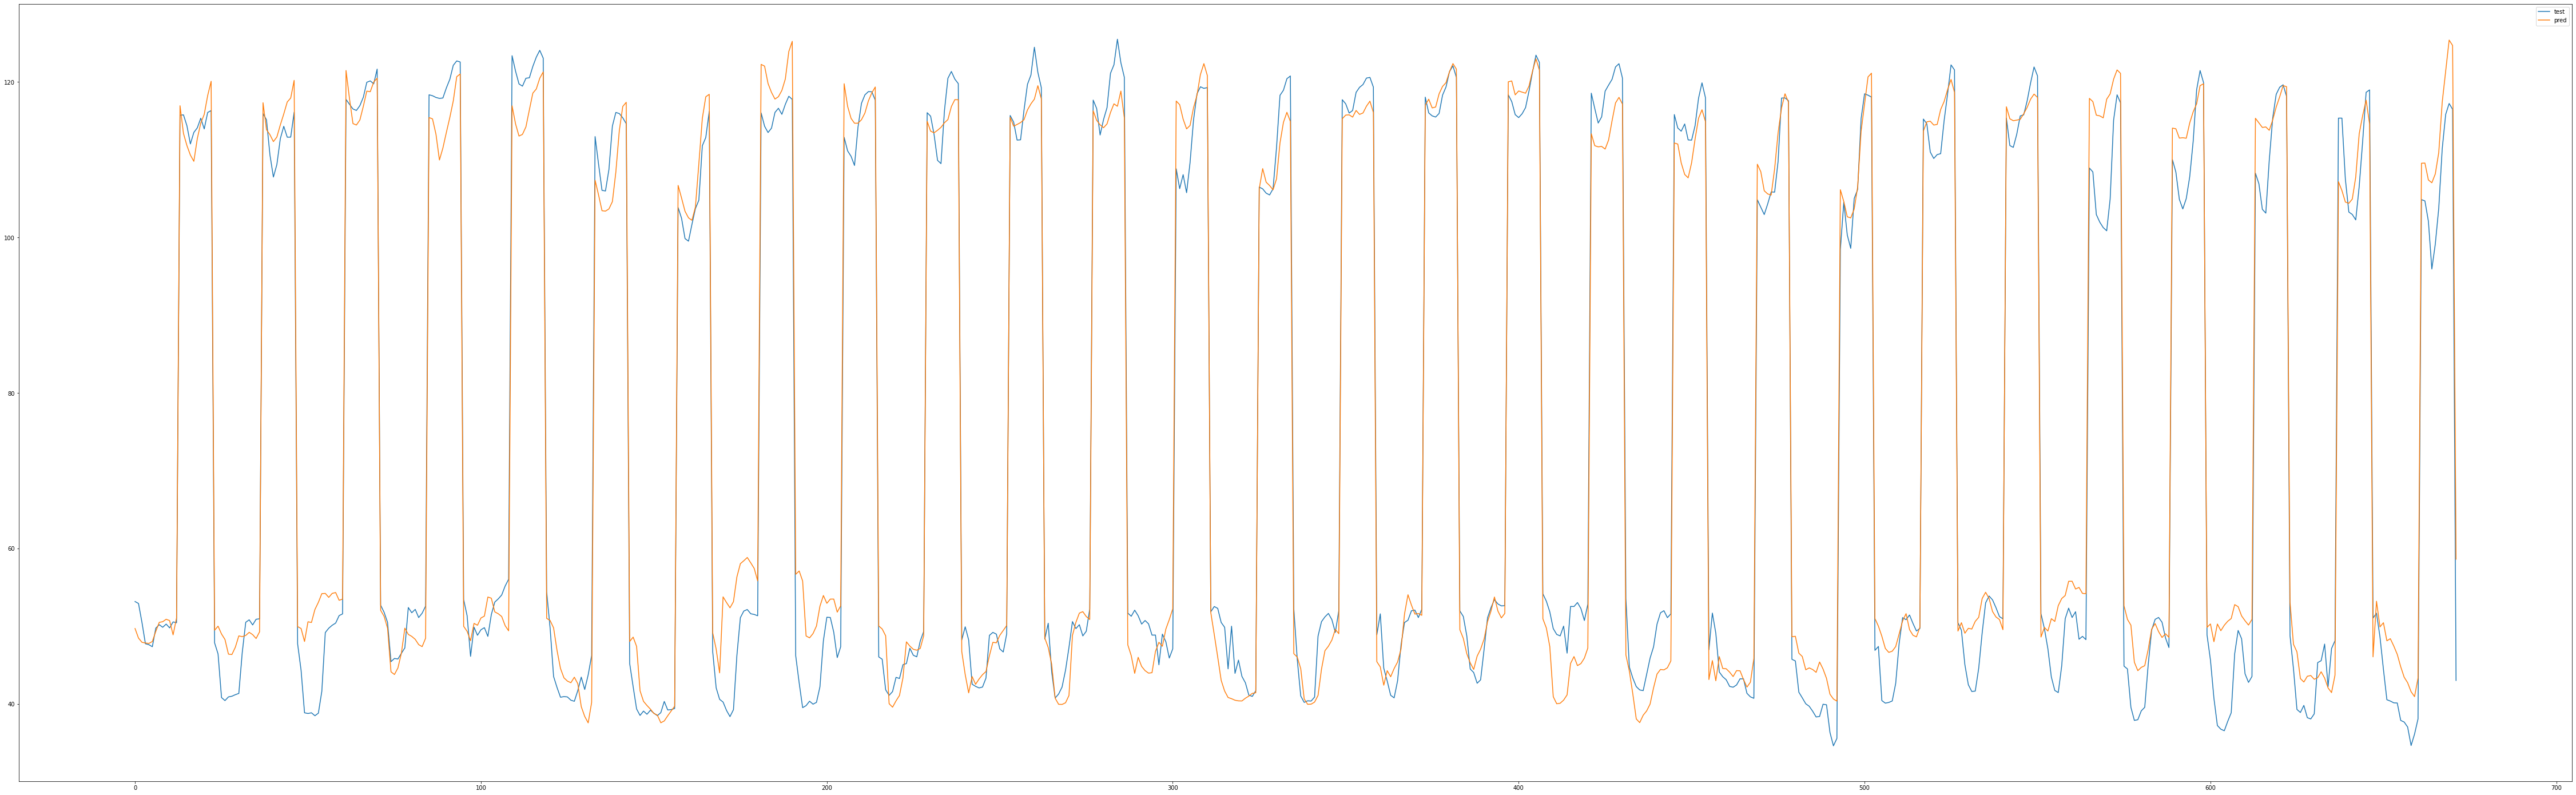

In [33]:
# make a prediction
yhat = model.predict(X_test_pd)
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test_pd[:, :]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
inv_y = np.concatenate((y_test_pd.reshape(-1,1), X_test_pd[:, :]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate metrics and plot:
plt.rcParams['figure.figsize'] = [80, 25]
print('Para los resultados de las últimas 4 semanas se obtiene un RMSE de ',np.sqrt(mean_squared_error(inv_y, inv_yhat)),', un R2 de ',r2_score(inv_y, inv_yhat),' y un MAPE de',mean_absolute_percentage_error(inv_y, inv_yhat))
plt.plot(inv_y, label='test')
plt.plot(inv_yhat, label='pred')
plt.legend()
plt.show()

Exporting the results:

In [42]:
pd.DataFrame({'y_test':inv_y, 'y_pred':inv_yhat},index = y[last_value:].index).to_csv('./../Visualization/Neural_network_Regression.csv')

## DNN with all data:

First, we read the data:

In [34]:
df = pd.read_csv('./final_dataframe.csv',index_col='datetime')

In [35]:
days = 28

It is important to considerate the time that we want to predict. If we want to know the price for 1 week, we will need to shift the target column X days so, with the information we have today, we can predict the value for the electricity in X days:

In [36]:
df['Termino_de_facturacion_de_energia_activa_del_PVPC_eficiencia_2_periodos_(DHA)']=df['Termino_de_facturacion_de_energia_activa_del_PVPC_eficiencia_2_periodos_(DHA)'].shift(-24*days)
df.dropna(axis=0,how='any',inplace=True)

Then we select the columns:

In [37]:
model_columns = ['Demanda_programada_P48_total', 
                 'Demanda_programada_P48_Correccion_eolica',
                 'Demanda_programada_P48_Correccion_solar',
                 'Precio_mercado_SPOT_Diario',
                 'Precio_mercado_SPOT_Intradiario_Sesion_1',
                 'Precio_mercado_SPOT_Intradiario_Sesion_2',
                 'Precio_mercado_SPOT_Intradiario_Sesion_3',
                 'Precio_mercado_SPOT_Intradiario_Sesion_4',
                 'Precio_mercado_SPOT_Intradiario_Sesion_5',
                 'Precio_mercado_SPOT_Intradiario_Sesion_6',
                 'Precio_mercado_SPOT_Intradiario_Sesion_7',
                 'Generacion_programada_P48_Biogas',
                 'Generacion_programada_P48_Biomasa',
                 'Generacion_programada_P48_Ciclo_combinado',
                 'Generacion_programada_P48_Consumo_bombeo',
                 'Generacion_programada_P48_Derivados_del_petroleo_o_carbon',
                 'Generacion_programada_P48_Energia_residual',
                 'Generacion_programada_P48_Enlace_Baleares',
                 'Generacion_programada_P48_Eolica_terrestre',
                 'Generacion_programada_P48_Gas_Natural',
                 'Generacion_programada_P48_Gas_Natural_Cogeneracion',
                 'Generacion_programada_P48_Hidraulica_UGH',
                 'Generacion_programada_P48_Hidraulica_no_UGH',
                 'Generacion_programada_P48_Hulla_antracita',
                 'Generacion_programada_P48_Hulla_sub-bituminosa',
                 'Generacion_programada_P48_Nuclear',
                 'Generacion_programada_P48_Oceano_y_geotermica',
                 'Generacion_programada_P48_Residuos_domesticos_y_similares',
                 'Generacion_programada_P48_Residuos_varios',
                 'Generacion_programada_P48_Solar_fotovoltaica',
                 'Generacion_programada_P48_Solar_termica',
                 'Generacion_programada_P48_Subproductos_mineria',
                 'Generacion_programada_P48_Turbinacion_bombeo',
                 'Consumer_price_index', 
                 'Time_required_to_get_electricity_(days)',
                 'Inflation,consumer_prices_(annual_%)',
                 'Employment_in_industry_(%_of_total_employment)', 
                 'PIB_Trimestral', 
                 'Var_Trim_PIB_(%)', 
                 'Var_anual_PIB_Trim_(%)',
                 'IBEX35',
                 'Red_Electrica',
                 'Temperature',
                 #'Weekday_Monday','Weekday_Tuesday', 'Weekday_Wednesday','Weekday_Thursday',
                 #'Weekday_Friday', 'Weekday_Saturday', 
                 'sin_weekday','cos_weekday',
                 'holidays', 
                 #'Hour_0', 'Hour_1', 'Hour_2',
                 #'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
                 #'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
                 #'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
                 #'Hour_22',
                 'sin_hour','cos_hour','sin_month','cos_month',
                 #'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
                 #'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
                 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7', 'Day_8',
                 'Day_9', 'Day_10', 'Day_11', 'Day_12', 'Day_13', 'Day_14', 'Day_15',
                 'Day_16', 'Day_17', 'Day_18', 'Day_19', 'Day_20', 'Day_21', 'Day_22',
                 'Day_23', 'Day_24', 'Day_25', 'Day_26', 'Day_27', 'Day_28', 'Day_29',
                 'Day_30']

After that we have to split the data into train and test:

In [38]:
# We are selecting the columns that we want:
df2 = df[['Termino_de_facturacion_de_energia_activa_del_PVPC_eficiencia_2_periodos_(DHA)']+model_columns]

# We fit the scalers:
scaler = MinMaxScaler(feature_range=(0, 1))
aux = scaler.fit_transform(df2)
df3 = pd.DataFrame(aux, columns = df2.columns, index=df2.index)
last_value = df3.shape[0]-24*days

# Then we split into X and y:
X = df3.loc[:,model_columns]
y = df3.loc[:,'Termino_de_facturacion_de_energia_activa_del_PVPC_eficiencia_2_periodos_(DHA)']

# We separate into train and test:
y_train_aux = y.iloc[:last_value,]
X_train_aux = X.iloc[:last_value,]
y_test_aux = y.iloc[last_value:,]
X_test_aux = X.iloc[last_value:,]

# Pasamos a float todo:
X_train = X_train_aux.values.astype('float32')
y_train = y_train_aux.values.astype('float32')
X_test = X_test_aux.values.astype('float32')
y_test = y_test_aux.values.astype('float32')

We build the model:

Epoch 1/50
2/2 - 4s - loss: 0.1880 - val_loss: 0.0559
Epoch 2/50
2/2 - 4s - loss: 0.0800 - val_loss: 0.0297
Epoch 3/50
2/2 - 4s - loss: 0.0511 - val_loss: 0.0296
Epoch 4/50
2/2 - 4s - loss: 0.0463 - val_loss: 0.0286
Epoch 5/50
2/2 - 4s - loss: 0.0461 - val_loss: 0.0217
Epoch 6/50
2/2 - 4s - loss: 0.0345 - val_loss: 0.0249
Epoch 7/50
2/2 - 4s - loss: 0.0379 - val_loss: 0.0177
Epoch 8/50
2/2 - 4s - loss: 0.0296 - val_loss: 0.0200
Epoch 9/50
2/2 - 4s - loss: 0.0284 - val_loss: 0.0148
Epoch 10/50
2/2 - 4s - loss: 0.0234 - val_loss: 0.0128
Epoch 11/50
2/2 - 4s - loss: 0.0246 - val_loss: 0.0129
Epoch 12/50
2/2 - 4s - loss: 0.0215 - val_loss: 0.0129
Epoch 13/50
2/2 - 4s - loss: 0.0201 - val_loss: 0.0103
Epoch 14/50
2/2 - 4s - loss: 0.0208 - val_loss: 0.0097
Epoch 15/50
2/2 - 4s - loss: 0.0190 - val_loss: 0.0108
Epoch 16/50
2/2 - 4s - loss: 0.0189 - val_loss: 0.0095
Epoch 17/50
2/2 - 4s - loss: 0.0180 - val_loss: 0.0095
Epoch 18/50
2/2 - 3s - loss: 0.0171 - val_loss: 0.0104
Epoch 19/50
2/2 - 4

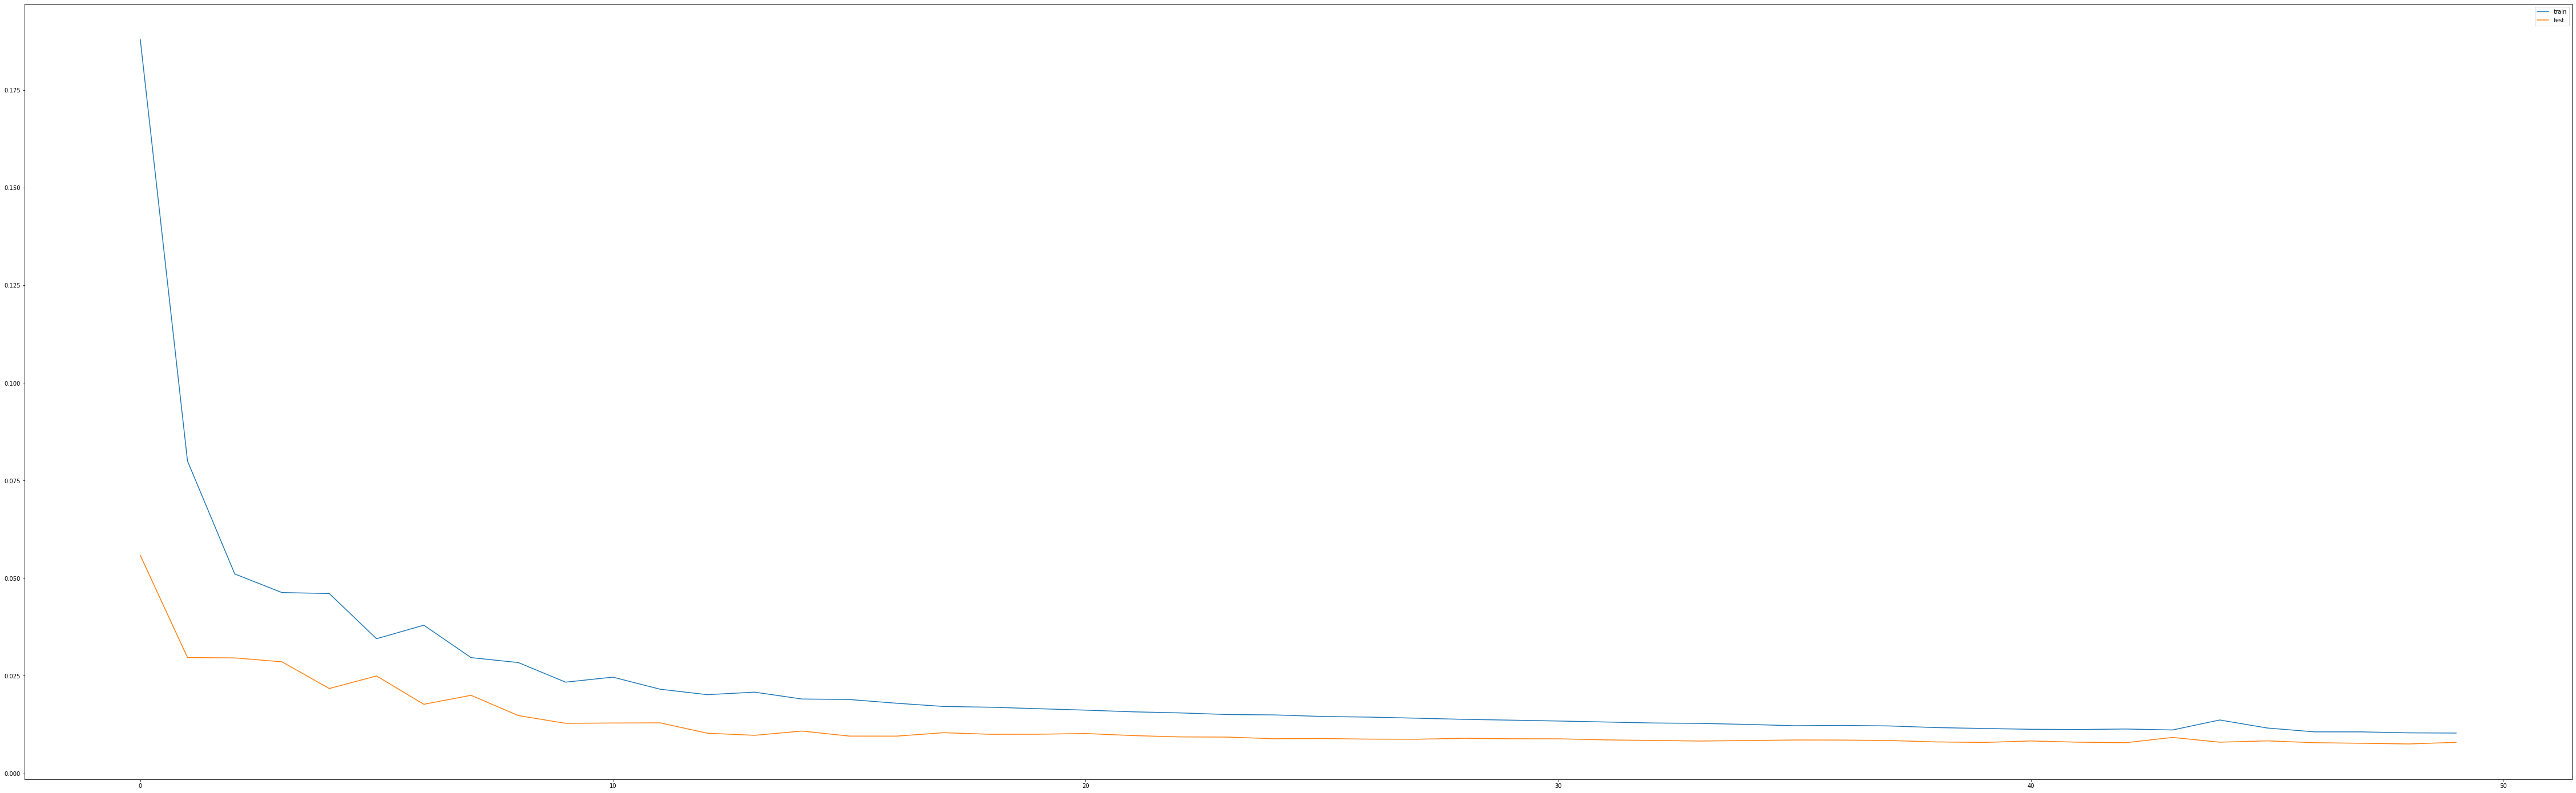

CPU times: user 30min 23s, sys: 11min 41s, total: 42min 4s
Wall time: 9min 7s


In [139]:
%%time
# design network
model = Sequential()
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=30000, validation_split=0.2, verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Finally we plot the results and the metrics:

Para los resultados de las últimas 4 semanas se obtiene un RMSE de  17.249817 , un R2 de  0.7440913745271798  y un MAPE de 26.527586579322815


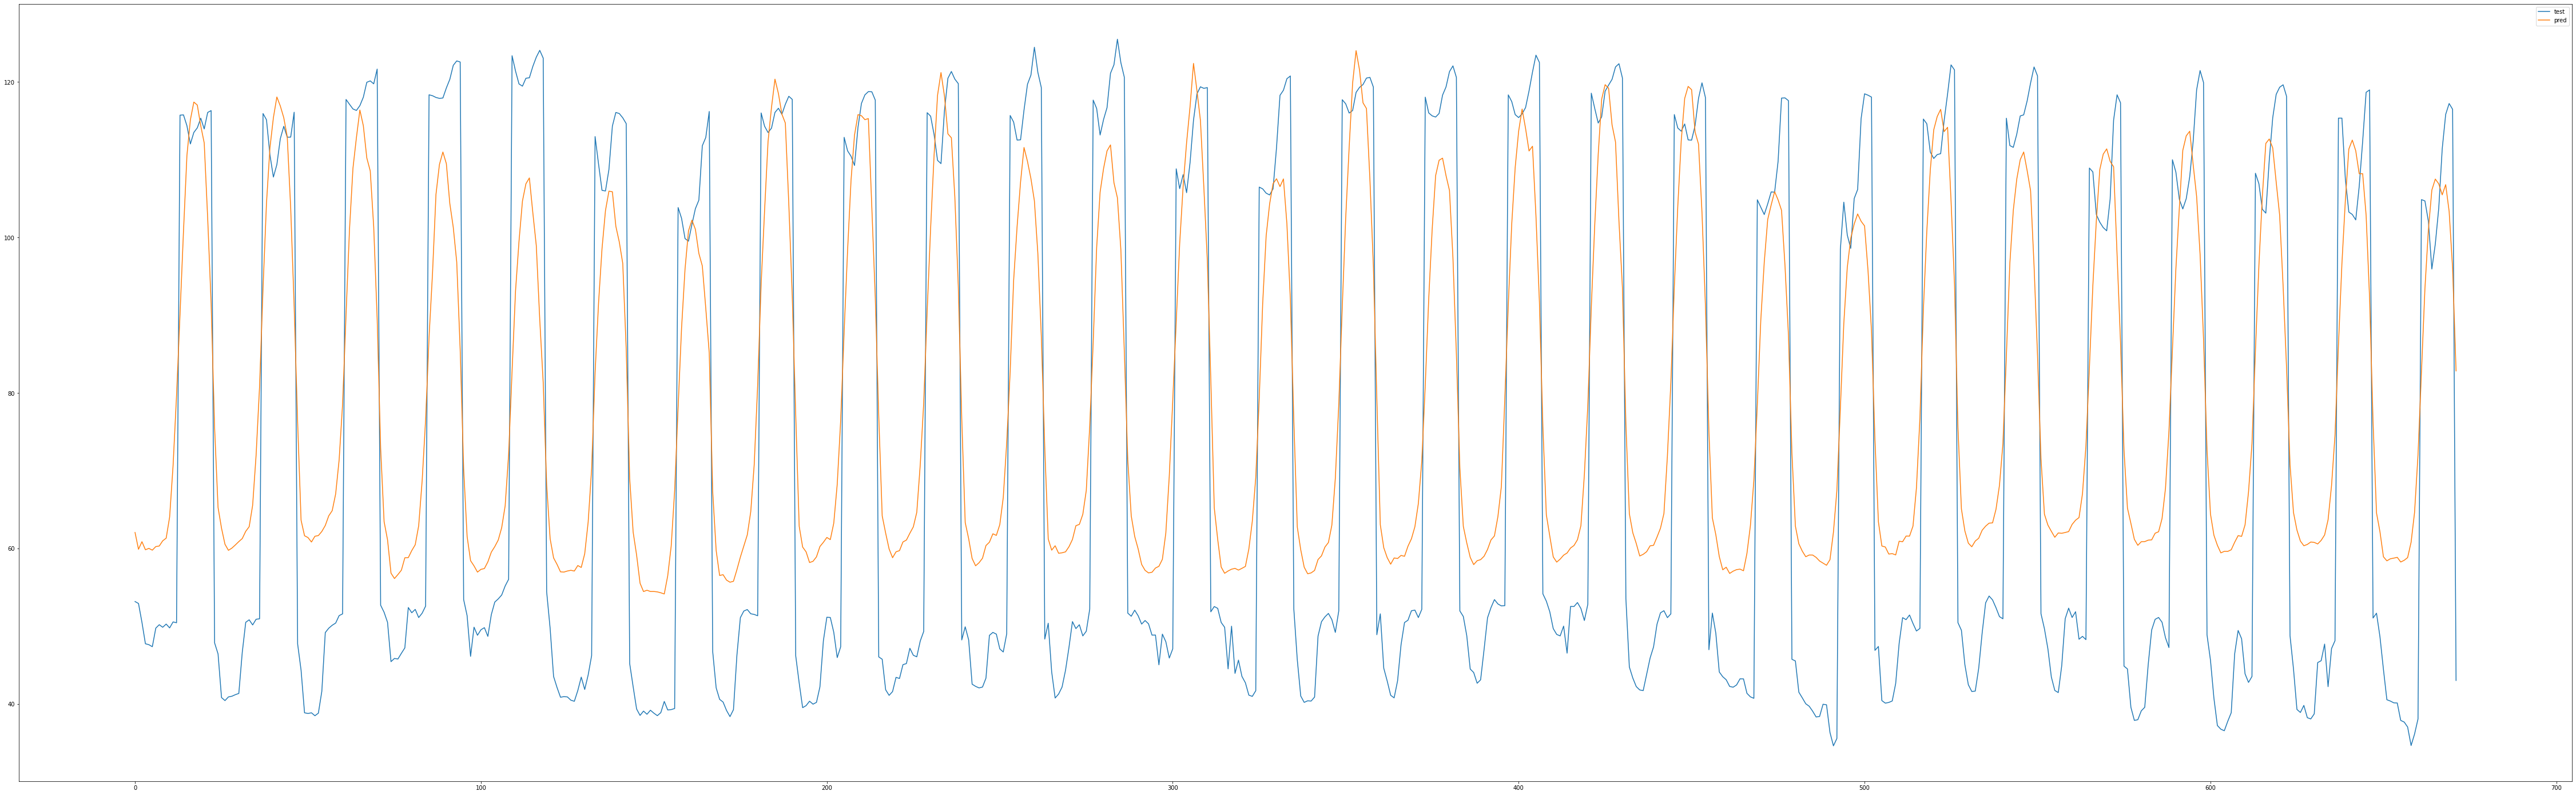

In [140]:
# make a prediction
yhat = model.predict(X_test)
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test[:, :]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
inv_y = np.concatenate((y_test.reshape(-1,1), X_test[:, :]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate metrics and plot:
plt.rcParams['figure.figsize'] = [80, 25]
print('Para los resultados de las últimas 4 semanas se obtiene un RMSE de ',np.sqrt(mean_squared_error(inv_y, inv_yhat)),', un R2 de ',r2_score(inv_y, inv_yhat),' y un MAPE de',mean_absolute_percentage_error(inv_y, inv_yhat))
plt.plot(inv_y, label='test')
plt.plot(inv_yhat, label='pred')
plt.legend(prop={'size': 40})
plt.xticks(rotation=90, fontsize = 7)
plt.show()

Exporting the results:

In [42]:
pd.DataFrame({'y_test':inv_y, 'y_pred':inv_yhat},index = y[last_value:].index).to_csv('./../Visualization/Neural_network_Regression.csv')